In [1]:
# Dependencies
import os
import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from WeatherAPI import api_key

# Incorporated citipy to determine city based on latitude and longtitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join(".", "output_data", "cities.csv")

# Rnage of latitudes and longtitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate City List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in tqdm(lat_lngs):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
if len(cities) >= 500:
    print("We are good")
else:
    print("We need more data")

1500it [00:00, 1703.94it/s]

We are good


# Perform API Calls

In [3]:
# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

In [4]:
# Create empty lists to store data
city_name = []
country = []
latitude = []
longtitude = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
n = 0

# Get relevant data for each city; use tqdm to track the progress
for city in tqdm(cities):
    url = base_url + city
    
    # to handle the unavailable data
    try:
        weather_data = requests.get(url).json()
        city_name.append(weather_data["name"])
        country.append(weather_data["sys"]["country"])
        latitude.append(weather_data["coord"]["lat"])
        longtitude.append(weather_data["coord"]["lon"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        cloudiness.append(weather_data["clouds"]["all"])
        wind_speed.append(weather_data["wind"]["speed"])
        n = n + 1
        print(f"city number: {n}, city name: {weather_data['name']}")

    except:
        pass
    
# Confirm we have sufficient data
if len(latitude) >= 500:
    print("We are good")
else:
    print("We need more data")

  0%|          | 2/623 [00:00<01:49,  5.65it/s]

city number: 1, city name: Kasongo-Lunda
city number: 2, city name: Kruisfontein


  1%|          | 4/623 [00:00<01:33,  6.63it/s]

city number: 3, city name: Bluff
city number: 4, city name: Rikitea


  1%|          | 6/623 [00:00<01:27,  7.08it/s]

city number: 5, city name: Butaritari


  1%|▏         | 8/623 [00:01<01:32,  6.61it/s]

city number: 6, city name: Aktau
city number: 7, city name: Palana


  2%|▏         | 10/623 [00:01<01:30,  6.74it/s]

city number: 8, city name: Wamba
city number: 9, city name: Nikolskoye


  2%|▏         | 12/623 [00:01<01:27,  6.95it/s]

city number: 10, city name: Tuktoyaktuk


  2%|▏         | 14/623 [00:01<01:25,  7.08it/s]

city number: 11, city name: Carnarvon
city number: 12, city name: Port Alfred


  3%|▎         | 16/623 [00:02<01:24,  7.14it/s]

city number: 13, city name: Ushuaia
city number: 14, city name: Upernavik


  3%|▎         | 18/623 [00:02<01:24,  7.14it/s]

city number: 15, city name: Hermanus
city number: 16, city name: Salalah


  3%|▎         | 20/623 [00:02<01:26,  6.98it/s]

city number: 17, city name: Gorin
city number: 18, city name: Arraial do Cabo


  4%|▎         | 22/623 [00:03<01:25,  7.04it/s]

city number: 19, city name: Westport
city number: 20, city name: Guerrero Negro


  4%|▍         | 24/623 [00:03<01:26,  6.93it/s]

city number: 21, city name: Chestermere
city number: 22, city name: Busselton


  4%|▍         | 26/623 [00:03<01:29,  6.70it/s]

city number: 23, city name: Kongoussi
city number: 24, city name: Vaini


  4%|▍         | 27/623 [00:04<01:30,  6.59it/s]

city number: 25, city name: Trier


  5%|▍         | 29/623 [00:04<01:30,  6.53it/s]

city number: 26, city name: Xewkija
city number: 27, city name: Khatanga


  5%|▍         | 31/623 [00:04<01:29,  6.61it/s]

city number: 28, city name: Atuona
city number: 29, city name: Mar del Plata


  5%|▌         | 33/623 [00:05<01:29,  6.56it/s]

city number: 30, city name: Kamina
city number: 31, city name: Portland


  5%|▌         | 34/623 [00:05<01:29,  6.61it/s]

city number: 32, city name: Kodiak


  6%|▌         | 35/623 [00:05<01:30,  6.51it/s]

city number: 33, city name: Litovko


  6%|▌         | 37/623 [00:05<01:30,  6.48it/s]

city number: 34, city name: Tungor


  6%|▋         | 39/623 [00:05<01:29,  6.55it/s]

city number: 35, city name: Pevek
city number: 36, city name: Hobart


  7%|▋         | 41/623 [00:06<01:29,  6.50it/s]

city number: 37, city name: Nhulunbuy
city number: 38, city name: Port Elizabeth


  7%|▋         | 43/623 [00:06<01:28,  6.55it/s]

city number: 39, city name: New Norfolk
city number: 40, city name: Soyo


  7%|▋         | 45/623 [00:06<01:27,  6.59it/s]

city number: 41, city name: Bambous Virieux
city number: 42, city name: Souillac


  8%|▊         | 47/623 [00:07<01:26,  6.65it/s]

city number: 43, city name: Hilo
city number: 44, city name: Nanortalik


  8%|▊         | 49/623 [00:07<01:25,  6.69it/s]

city number: 45, city name: Geraldton


  8%|▊         | 51/623 [00:07<01:26,  6.63it/s]

city number: 46, city name: Vila Velha
city number: 47, city name: San Patricio


  9%|▊         | 53/623 [00:08<01:26,  6.57it/s]

city number: 48, city name: Belaya Gora
city number: 49, city name: Codrington


  9%|▉         | 55/623 [00:08<01:25,  6.61it/s]

city number: 50, city name: Chokurdakh


  9%|▉         | 56/623 [00:08<01:25,  6.63it/s]

city number: 51, city name: Jalu


  9%|▉         | 58/623 [00:08<01:25,  6.59it/s]

city number: 52, city name: Aquiraz
city number: 53, city name: Nome


 10%|▉         | 61/623 [00:09<01:24,  6.65it/s]

city number: 54, city name: Touros
city number: 55, city name: Santa Maria


 10%|█         | 63/623 [00:09<01:23,  6.68it/s]

city number: 56, city name: Cape Town
city number: 57, city name: Avera


 10%|█         | 65/623 [00:09<01:23,  6.66it/s]

city number: 58, city name: Puerto Ayora
city number: 59, city name: Riyadh


 11%|█         | 67/623 [00:10<01:24,  6.62it/s]

city number: 60, city name: Cap Malheureux
city number: 61, city name: Qaanaaq


 11%|█         | 68/623 [00:10<01:23,  6.64it/s]

city number: 62, city name: Hithadhoo


 11%|█         | 70/623 [00:10<01:23,  6.61it/s]

city number: 63, city name: Humberto de Campos


 12%|█▏        | 74/623 [00:11<01:22,  6.62it/s]

city number: 64, city name: Pemba
city number: 65, city name: Black River


 12%|█▏        | 76/623 [00:11<01:22,  6.64it/s]

city number: 66, city name: Wasilla
city number: 67, city name: Punta Arenas


 13%|█▎        | 79/623 [00:11<01:21,  6.68it/s]

city number: 68, city name: Port Hedland
city number: 69, city name: Klaksvik


 13%|█▎        | 81/623 [00:12<01:21,  6.65it/s]

city number: 70, city name: Ust-Maya


 13%|█▎        | 83/623 [00:12<01:21,  6.64it/s]

city number: 71, city name: Severo-Kurilsk
city number: 72, city name: Bredasdorp


 14%|█▎        | 85/623 [00:12<01:21,  6.62it/s]

city number: 73, city name: Vega de Alatorre


 14%|█▍        | 87/623 [00:13<01:20,  6.65it/s]

city number: 74, city name: Solnechnyy
city number: 75, city name: Prince Rupert


 14%|█▍        | 88/623 [00:13<01:20,  6.66it/s]

city number: 76, city name: Airai


 14%|█▍        | 90/623 [00:13<01:21,  6.50it/s]

city number: 77, city name: Saint-Georges


 15%|█▍        | 91/623 [00:13<01:21,  6.52it/s]

city number: 78, city name: Fortuna


 15%|█▍        | 93/623 [00:14<01:21,  6.50it/s]

city number: 79, city name: La Romana
city number: 80, city name: Mataura


 15%|█▌        | 94/623 [00:14<01:21,  6.45it/s]

city number: 81, city name: Babu


 15%|█▌        | 96/623 [00:14<01:21,  6.43it/s]

city number: 82, city name: Mazamari


 16%|█▌        | 97/623 [00:15<01:22,  6.37it/s]

city number: 83, city name: Miguel Hidalgo


 16%|█▌        | 99/623 [00:15<01:22,  6.36it/s]

city number: 84, city name: Amuntai
city number: 85, city name: Huarmey


 16%|█▋        | 102/623 [00:16<01:21,  6.36it/s]

city number: 86, city name: Sechura
city number: 87, city name: Saskylakh


 17%|█▋        | 104/623 [00:16<01:21,  6.39it/s]

city number: 88, city name: Avarua
city number: 89, city name: Castro


 17%|█▋        | 106/623 [00:16<01:20,  6.41it/s]

city number: 90, city name: Sao Joao da Barra
city number: 91, city name: Jamestown


 17%|█▋        | 107/623 [00:16<01:20,  6.38it/s]

city number: 92, city name: Port Macquarie


 17%|█▋        | 108/623 [00:17<01:21,  6.35it/s]

city number: 93, city name: Beira


 18%|█▊        | 110/623 [00:17<01:20,  6.34it/s]

city number: 94, city name: Auburn
city number: 95, city name: Cherskiy


 18%|█▊        | 112/623 [00:17<01:20,  6.32it/s]

city number: 96, city name: Nemuro
city number: 97, city name: Channel-Port aux Basques


 18%|█▊        | 113/623 [00:17<01:20,  6.33it/s]

city number: 98, city name: Ponta do Sol


 18%|█▊        | 115/623 [00:18<01:20,  6.31it/s]

city number: 99, city name: Magadi
city number: 100, city name: Bathsheba


 19%|█▉        | 117/623 [00:18<01:20,  6.30it/s]

city number: 101, city name: Kisangani
city number: 102, city name: Cabo San Lucas


 19%|█▉        | 119/623 [00:18<01:20,  6.29it/s]

city number: 103, city name: Meghraj
city number: 104, city name: Aklavik


 19%|█▉        | 121/623 [00:19<01:19,  6.31it/s]

city number: 105, city name: Bethel
city number: 106, city name: East London


 20%|█▉        | 123/623 [00:19<01:20,  6.24it/s]

city number: 107, city name: Montrose
city number: 108, city name: Komsomolskiy


 20%|██        | 125/623 [00:20<01:20,  6.22it/s]

city number: 109, city name: Huron
city number: 110, city name: Los Llanos de Aridane


 21%|██        | 128/623 [00:20<01:19,  6.22it/s]

city number: 111, city name: Ayan
city number: 112, city name: Tommot


 21%|██        | 130/623 [00:20<01:19,  6.21it/s]

city number: 113, city name: Puerto Escondido
city number: 114, city name: Vestmanna


 21%|██        | 132/623 [00:21<01:18,  6.23it/s]

city number: 115, city name: Ilulissat
city number: 116, city name: Yellowknife


 22%|██▏       | 134/623 [00:21<01:18,  6.25it/s]

city number: 117, city name: Comodoro Rivadavia
city number: 118, city name: Kavieng


 22%|██▏       | 135/623 [00:21<01:18,  6.23it/s]

city number: 119, city name: Mayya


 22%|██▏       | 136/623 [00:21<01:18,  6.21it/s]

city number: 120, city name: Waingapu


 22%|██▏       | 138/623 [00:22<01:18,  6.20it/s]

city number: 121, city name: Bollnas
city number: 122, city name: Provideniya


 22%|██▏       | 140/623 [00:22<01:17,  6.22it/s]

city number: 123, city name: Sola
city number: 124, city name: Barceloneta


 23%|██▎       | 142/623 [00:22<01:17,  6.24it/s]

city number: 125, city name: Kapaa
city number: 126, city name: Lorengau


 23%|██▎       | 144/623 [00:23<01:16,  6.26it/s]

city number: 127, city name: Hasaki
city number: 128, city name: Labuhan


 23%|██▎       | 146/623 [00:23<01:15,  6.28it/s]

city number: 129, city name: Praia da Vitoria
city number: 130, city name: Albany


 24%|██▍       | 148/623 [00:23<01:15,  6.26it/s]

city number: 131, city name: Lufilufi
city number: 132, city name: Dikson


 24%|██▍       | 150/623 [00:23<01:15,  6.28it/s]

city number: 133, city name: Barrow
city number: 134, city name: Isangel


 24%|██▍       | 152/623 [00:24<01:15,  6.27it/s]

city number: 135, city name: Truro
city number: 136, city name: Carballo


 25%|██▍       | 155/623 [00:24<01:14,  6.26it/s]

city number: 137, city name: Tomatlan
city number: 138, city name: Sobolevo


 25%|██▌       | 157/623 [00:25<01:14,  6.25it/s]

city number: 139, city name: Beloha
city number: 140, city name: College


 26%|██▌       | 159/623 [00:25<01:13,  6.27it/s]

city number: 141, city name: Hofn
city number: 142, city name: Quatre Cocos


 26%|██▌       | 162/623 [00:25<01:13,  6.30it/s]

city number: 143, city name: Iqaluit


 26%|██▋       | 164/623 [00:25<01:12,  6.31it/s]

city number: 144, city name: Boende


 27%|██▋       | 166/623 [00:26<01:12,  6.30it/s]

city number: 145, city name: Tarakan
city number: 146, city name: Bubaque


 27%|██▋       | 168/623 [00:26<01:12,  6.30it/s]

city number: 147, city name: Kudahuvadhoo
city number: 148, city name: Katsuura


 27%|██▋       | 169/623 [00:26<01:11,  6.31it/s]

city number: 149, city name: Saint-Philippe


 27%|██▋       | 171/623 [00:27<01:11,  6.30it/s]

city number: 150, city name: Firovo
city number: 151, city name: Thinadhoo


 28%|██▊       | 172/623 [00:27<01:11,  6.31it/s]

city number: 152, city name: Torbay


 28%|██▊       | 173/623 [00:27<01:11,  6.29it/s]

city number: 153, city name: Manggar


 28%|██▊       | 175/623 [00:27<01:11,  6.29it/s]

city number: 154, city name: Kichera
city number: 155, city name: Rocha


 28%|██▊       | 177/623 [00:28<01:10,  6.30it/s]

city number: 156, city name: Inuvik
city number: 157, city name: Talnakh


 29%|██▊       | 179/623 [00:28<01:10,  6.32it/s]

city number: 158, city name: Chuy
city number: 159, city name: Lata


 29%|██▉       | 181/623 [00:28<01:09,  6.33it/s]

city number: 160, city name: Oktyabrskoye


 29%|██▉       | 183/623 [00:28<01:09,  6.35it/s]

city number: 161, city name: Kaitangata
city number: 162, city name: Ixtapa


 30%|██▉       | 185/623 [00:29<01:08,  6.36it/s]

city number: 163, city name: Puerto Baquerizo Moreno
city number: 164, city name: Ahipara


 30%|██▉       | 186/623 [00:29<01:08,  6.34it/s]

city number: 165, city name: Ribeira Brava


 30%|███       | 188/623 [00:29<01:08,  6.34it/s]

city number: 166, city name: Delbruck
city number: 167, city name: Norman Wells


 30%|███       | 190/623 [00:29<01:08,  6.35it/s]

city number: 168, city name: Tiksi


 31%|███       | 191/623 [00:30<01:08,  6.34it/s]

city number: 169, city name: Mchinji


 31%|███       | 193/623 [00:30<01:07,  6.33it/s]

city number: 170, city name: Okara


 31%|███▏      | 195/623 [00:30<01:07,  6.34it/s]

city number: 171, city name: Emerald
city number: 172, city name: Pisco


 31%|███▏      | 196/623 [00:30<01:07,  6.33it/s]

city number: 173, city name: Gagarin


 32%|███▏      | 197/623 [00:31<01:07,  6.31it/s]

city number: 174, city name: Parambu


 32%|███▏      | 198/623 [00:31<01:07,  6.30it/s]

city number: 175, city name: Gualaquiza


 32%|███▏      | 199/623 [00:31<01:07,  6.29it/s]

city number: 176, city name: Lichinga


 32%|███▏      | 201/623 [00:32<01:07,  6.28it/s]

city number: 177, city name: Kilindoni
city number: 178, city name: Beringovskiy


 33%|███▎      | 203/623 [00:32<01:06,  6.27it/s]

city number: 179, city name: Riohacha
city number: 180, city name: Saldanha


 33%|███▎      | 205/623 [00:32<01:06,  6.27it/s]

city number: 181, city name: Hun


 33%|███▎      | 207/623 [00:33<01:06,  6.26it/s]

city number: 182, city name: Zhigansk
city number: 183, city name: Sorland


 34%|███▎      | 209/623 [00:33<01:06,  6.25it/s]

city number: 184, city name: Marsa Matruh


 34%|███▎      | 210/623 [00:33<01:06,  6.24it/s]

city number: 185, city name: Mistrato


 34%|███▍      | 211/623 [00:33<01:06,  6.22it/s]

city number: 186, city name: Tarnogskiy Gorodok


 34%|███▍      | 213/623 [00:34<01:05,  6.22it/s]

city number: 187, city name: Luwuk
city number: 188, city name: Flinders


 34%|███▍      | 214/623 [00:34<01:05,  6.21it/s]

city number: 189, city name: Wuwei


 35%|███▍      | 215/623 [00:34<01:05,  6.19it/s]

city number: 190, city name: Tecoanapa


 35%|███▍      | 216/623 [00:34<01:05,  6.18it/s]

city number: 191, city name: Wanning


 35%|███▍      | 217/623 [00:35<01:05,  6.17it/s]

city number: 192, city name: Dangara


 35%|███▌      | 219/623 [00:35<01:05,  6.16it/s]

city number: 193, city name: Auki
city number: 194, city name: Mazagao


 36%|███▌      | 222/623 [00:36<01:05,  6.16it/s]

city number: 195, city name: Platteville
city number: 196, city name: Milkovo


 36%|███▌      | 224/623 [00:36<01:04,  6.18it/s]

city number: 197, city name: Thompson
city number: 198, city name: Egvekinot


 36%|███▌      | 225/623 [00:36<01:04,  6.18it/s]

city number: 199, city name: Saint-Augustin


 36%|███▋      | 226/623 [00:36<01:04,  6.17it/s]

city number: 200, city name: Khandbari


 37%|███▋      | 228/623 [00:37<01:04,  6.09it/s]

city number: 201, city name: Amahai


 37%|███▋      | 229/623 [00:37<01:05,  6.05it/s]

city number: 202, city name: Lira


 37%|███▋      | 230/623 [00:38<01:05,  6.02it/s]

city number: 203, city name: Sao Filipe


 37%|███▋      | 231/623 [00:38<01:05,  5.97it/s]

city number: 204, city name: Parabel


 37%|███▋      | 232/623 [00:38<01:05,  5.95it/s]

city number: 205, city name: Georgetown


 37%|███▋      | 233/623 [00:40<01:07,  5.82it/s]

city number: 206, city name: Kholmogory


 38%|███▊      | 235/623 [00:40<01:07,  5.74it/s]

city number: 207, city name: Kieta


 38%|███▊      | 237/623 [00:42<01:08,  5.61it/s]

city number: 208, city name: Itarema
city number: 209, city name: Ostrovnoy


 38%|███▊      | 239/623 [00:42<01:08,  5.62it/s]

city number: 210, city name: Eyl
city number: 211, city name: Inirida


 39%|███▊      | 240/623 [00:42<01:08,  5.63it/s]

city number: 212, city name: Lebu


 39%|███▊      | 241/623 [00:42<01:07,  5.62it/s]

city number: 213, city name: Ossora


 39%|███▉      | 242/623 [00:43<01:07,  5.62it/s]

city number: 214, city name: Mugumu


 39%|███▉      | 243/623 [00:43<01:07,  5.61it/s]

city number: 215, city name: Nicoya


 39%|███▉      | 245/623 [00:43<01:07,  5.61it/s]

city number: 216, city name: Chifeng
city number: 217, city name: Cidreira


 40%|███▉      | 247/623 [00:44<01:07,  5.60it/s]

city number: 218, city name: Pingshan
city number: 219, city name: Eureka


 40%|███▉      | 248/623 [00:44<01:06,  5.61it/s]

city number: 220, city name: Erzin


 40%|███▉      | 249/623 [00:44<01:06,  5.61it/s]

city number: 221, city name: Bolshaya Dzhalga


 40%|████      | 251/623 [00:44<01:06,  5.61it/s]

city number: 222, city name: Fenyi
city number: 223, city name: Sitka


 40%|████      | 252/623 [00:45<01:06,  5.59it/s]

city number: 224, city name: Dali


 41%|████      | 254/623 [00:45<01:06,  5.58it/s]

city number: 225, city name: La Baule-Escoublac
city number: 226, city name: Salinopolis


 41%|████      | 255/623 [00:45<01:05,  5.58it/s]

city number: 227, city name: Pochutla


 41%|████      | 256/623 [00:46<01:06,  5.54it/s]

city number: 228, city name: San Andres


 41%|████▏     | 257/623 [00:46<01:06,  5.54it/s]

city number: 229, city name: Nouadhibou


 41%|████▏     | 258/623 [00:46<01:05,  5.53it/s]

city number: 230, city name: Diu


 42%|████▏     | 259/623 [00:46<01:05,  5.53it/s]

city number: 231, city name: Verkh-Usugli


 42%|████▏     | 260/623 [00:47<01:05,  5.52it/s]

city number: 232, city name: Zalantun


 42%|████▏     | 261/623 [00:47<01:05,  5.52it/s]

city number: 233, city name: Marshalltown


 42%|████▏     | 263/623 [00:47<01:05,  5.51it/s]

city number: 234, city name: Severodvinsk
city number: 235, city name: Ust-Nera


 43%|████▎     | 265/623 [00:47<01:04,  5.52it/s]

city number: 236, city name: Lompoc


 43%|████▎     | 267/623 [00:48<01:04,  5.53it/s]

city number: 237, city name: Hommelvik
city number: 238, city name: Sibolga


 43%|████▎     | 268/623 [00:48<01:04,  5.53it/s]

city number: 239, city name: Mahebourg


 43%|████▎     | 269/623 [00:48<01:04,  5.53it/s]

city number: 240, city name: Bumbuna


 43%|████▎     | 271/623 [00:49<01:03,  5.53it/s]

city number: 241, city name: Caxito
city number: 242, city name: Hami


 44%|████▍     | 273/623 [00:49<01:03,  5.52it/s]

city number: 243, city name: Yunyang


 44%|████▍     | 275/623 [00:49<01:02,  5.52it/s]

city number: 244, city name: Banda Aceh
city number: 245, city name: Constitucion


 44%|████▍     | 276/623 [00:49<01:02,  5.52it/s]

city number: 246, city name: Challans


 44%|████▍     | 277/623 [00:50<01:02,  5.52it/s]

city number: 247, city name: Wundanyi


 45%|████▍     | 279/623 [00:50<01:02,  5.51it/s]

city number: 248, city name: Yinchuan


 45%|████▍     | 280/623 [00:50<01:02,  5.51it/s]

city number: 249, city name: Naryan-Mar


 45%|████▌     | 282/623 [00:51<01:01,  5.51it/s]

city number: 250, city name: Coos Bay
city number: 251, city name: Vrangel


 46%|████▌     | 284/623 [00:51<01:01,  5.51it/s]

city number: 252, city name: Meulaboh
city number: 253, city name: Hamilton


 46%|████▌     | 285/623 [00:51<01:01,  5.52it/s]

city number: 254, city name: Inhambane


 46%|████▌     | 287/623 [00:52<01:00,  5.51it/s]

city number: 255, city name: Laguna
city number: 256, city name: Petropavlovsk-Kamchatskiy


 46%|████▋     | 289/623 [00:52<01:00,  5.51it/s]

city number: 257, city name: Puerto Maldonado


 47%|████▋     | 290/623 [00:52<01:00,  5.51it/s]

city number: 258, city name: Fukue


 47%|████▋     | 292/623 [00:53<01:00,  5.51it/s]

city number: 259, city name: Miri
city number: 260, city name: Nantucket


 47%|████▋     | 295/623 [00:53<00:59,  5.52it/s]

city number: 261, city name: Kizlyar
city number: 262, city name: Turukhansk


 48%|████▊     | 298/623 [00:53<00:58,  5.53it/s]

city number: 263, city name: Kavaratti
city number: 264, city name: Kathmandu


 48%|████▊     | 299/623 [00:54<00:58,  5.54it/s]

city number: 265, city name: Ribeira Grande


 48%|████▊     | 300/623 [00:54<00:58,  5.53it/s]

city number: 266, city name: Krabi


 48%|████▊     | 302/623 [00:54<00:58,  5.53it/s]

city number: 267, city name: Hellin
city number: 268, city name: Tasiilaq


 49%|████▉     | 304/623 [00:54<00:57,  5.53it/s]

city number: 269, city name: Bang Saphan
city number: 270, city name: Ulaanbaatar


 49%|████▉     | 306/623 [00:55<00:57,  5.53it/s]

city number: 271, city name: Omboue


 49%|████▉     | 307/623 [00:55<00:57,  5.54it/s]

city number: 272, city name: Tura


 50%|████▉     | 309/623 [00:55<00:56,  5.54it/s]

city number: 273, city name: Key Largo


 50%|████▉     | 311/623 [00:56<00:56,  5.54it/s]

city number: 274, city name: Mpika
city number: 275, city name: Kenora


 50%|█████     | 312/623 [00:56<00:56,  5.54it/s]

city number: 276, city name: Redcliffe


 50%|█████     | 313/623 [00:56<00:56,  5.52it/s]

city number: 277, city name: Tiruchchendur


 50%|█████     | 314/623 [00:56<00:55,  5.52it/s]

city number: 278, city name: Kalmunai


 51%|█████     | 315/623 [00:57<00:55,  5.51it/s]

city number: 279, city name: Piedras Negras


 51%|█████     | 317/623 [00:57<00:55,  5.50it/s]

city number: 280, city name: Benguela
city number: 281, city name: Mount Isa


 51%|█████     | 318/623 [00:57<00:55,  5.50it/s]

city number: 282, city name: Slonim


 51%|█████     | 319/623 [00:58<00:55,  5.50it/s]

city number: 283, city name: Dossor


 52%|█████▏    | 321/623 [00:58<00:54,  5.50it/s]

city number: 284, city name: Puerto El Triunfo
city number: 285, city name: Leningradskiy


 52%|█████▏    | 323/623 [00:58<00:54,  5.50it/s]

city number: 286, city name: Santa Vitoria do Palmar
city number: 287, city name: Faanui


 52%|█████▏    | 325/623 [00:58<00:54,  5.51it/s]

city number: 288, city name: Rajshahi
city number: 289, city name: Teguldet


 52%|█████▏    | 326/623 [00:59<00:53,  5.50it/s]

city number: 290, city name: Lesnoye


 53%|█████▎    | 328/623 [00:59<00:53,  5.51it/s]

city number: 291, city name: Shirokiy


 53%|█████▎    | 329/623 [00:59<00:53,  5.51it/s]

city number: 292, city name: Nuuk


 53%|█████▎    | 330/623 [00:59<00:53,  5.50it/s]

city number: 293, city name: Ivanava


 53%|█████▎    | 331/623 [01:00<00:53,  5.50it/s]

city number: 294, city name: Mazatlan


 53%|█████▎    | 332/623 [01:00<00:52,  5.49it/s]

city number: 295, city name: Oriximina


 54%|█████▎    | 334/623 [01:00<00:52,  5.49it/s]

city number: 296, city name: Wanxian
city number: 297, city name: Kununurra


 54%|█████▍    | 336/623 [01:01<00:52,  5.50it/s]

city number: 298, city name: Imbituba
city number: 299, city name: Cayenne


 54%|█████▍    | 338/623 [01:01<00:51,  5.51it/s]

city number: 300, city name: Mogadishu
city number: 301, city name: Hambantota


 54%|█████▍    | 339/623 [01:01<00:51,  5.50it/s]

city number: 302, city name: Luis Correia


 55%|█████▍    | 340/623 [01:01<00:51,  5.49it/s]

city number: 303, city name: North Augusta


 55%|█████▍    | 342/623 [01:02<00:51,  5.50it/s]

city number: 304, city name: Port Keats


 55%|█████▌    | 343/623 [01:02<00:50,  5.49it/s]

city number: 305, city name: Kiboga


 55%|█████▌    | 345/623 [01:02<00:50,  5.49it/s]

city number: 306, city name: Hienghene


 56%|█████▌    | 347/623 [01:03<00:50,  5.48it/s]

city number: 307, city name: Verkhnevilyuysk
city number: 308, city name: Winnemucca


 56%|█████▌    | 348/623 [01:03<00:50,  5.48it/s]

city number: 309, city name: Yumen


 56%|█████▌    | 349/623 [01:03<00:50,  5.48it/s]

city number: 310, city name: Kabalo


 56%|█████▌    | 350/623 [01:03<00:49,  5.48it/s]

city number: 311, city name: Siuna


 57%|█████▋    | 352/623 [01:04<00:49,  5.47it/s]

city number: 312, city name: Pucallpa
city number: 313, city name: Darhan


 57%|█████▋    | 354/623 [01:04<00:49,  5.47it/s]

city number: 314, city name: Nuristan
city number: 315, city name: Beatrice


 57%|█████▋    | 355/623 [01:04<00:48,  5.48it/s]

city number: 316, city name: Taltal


 57%|█████▋    | 356/623 [01:05<00:48,  5.48it/s]

city number: 317, city name: Dergachi


 57%|█████▋    | 357/623 [01:05<00:48,  5.47it/s]

city number: 318, city name: Marevo


 57%|█████▋    | 358/623 [01:05<00:48,  5.47it/s]

city number: 319, city name: Neiafu


 58%|█████▊    | 359/623 [01:05<00:48,  5.47it/s]

city number: 320, city name: Nosy Varika


 58%|█████▊    | 360/623 [01:05<00:48,  5.46it/s]

city number: 321, city name: Teya


 58%|█████▊    | 361/623 [01:06<00:47,  5.46it/s]

city number: 322, city name: Zhanaozen


 58%|█████▊    | 363/623 [01:06<00:47,  5.46it/s]

city number: 323, city name: Caibarien
city number: 324, city name: Mount Gambier


 59%|█████▊    | 365/623 [01:06<00:47,  5.46it/s]

city number: 325, city name: Mbuji-Mayi
city number: 326, city name: Necochea


 59%|█████▉    | 367/623 [01:07<00:46,  5.47it/s]

city number: 327, city name: Adrar
city number: 328, city name: Esperance


 59%|█████▉    | 369/623 [01:07<00:46,  5.46it/s]

city number: 329, city name: Malinovskiy
city number: 330, city name: Regina


 59%|█████▉    | 370/623 [01:08<00:46,  5.43it/s]

city number: 331, city name: Zonguldak


 60%|█████▉    | 372/623 [01:08<00:46,  5.43it/s]

city number: 332, city name: Sur
city number: 333, city name: Lalmohan


 60%|█████▉    | 373/623 [01:08<00:46,  5.42it/s]

city number: 334, city name: Mareeba


 60%|██████    | 374/623 [01:08<00:45,  5.42it/s]

city number: 335, city name: Richards Bay


 60%|██████    | 375/623 [01:09<00:45,  5.42it/s]

city number: 336, city name: Madang


 61%|██████    | 377/623 [01:09<00:45,  5.42it/s]

city number: 337, city name: Chumikan
city number: 338, city name: Angoche


 61%|██████    | 379/623 [01:09<00:44,  5.43it/s]

city number: 339, city name: Lagoa
city number: 340, city name: Henties Bay


 61%|██████    | 380/623 [01:09<00:44,  5.43it/s]

city number: 341, city name: Havre-Saint-Pierre


 61%|██████▏   | 382/623 [01:10<00:44,  5.43it/s]

city number: 342, city name: Bardsir
city number: 343, city name: Anadyr


 62%|██████▏   | 384/623 [01:10<00:43,  5.43it/s]

city number: 344, city name: Kirksville
city number: 345, city name: Port Lincoln


 62%|██████▏   | 385/623 [01:10<00:43,  5.43it/s]

city number: 346, city name: Kirakira


 62%|██████▏   | 387/623 [01:11<00:43,  5.43it/s]

city number: 347, city name: Palmdale
city number: 348, city name: Araouane


 62%|██████▏   | 388/623 [01:11<00:43,  5.42it/s]

city number: 349, city name: Zuwarah


 63%|██████▎   | 390/623 [01:11<00:42,  5.43it/s]

city number: 350, city name: Castellarano
city number: 351, city name: Port Blair


 63%|██████▎   | 391/623 [01:11<00:42,  5.43it/s]

city number: 352, city name: Namatanai


 63%|██████▎   | 392/623 [01:12<00:42,  5.43it/s]

city number: 353, city name: Sulechow


 63%|██████▎   | 393/623 [01:12<00:42,  5.42it/s]

city number: 354, city name: Okhansk


 63%|██████▎   | 395/623 [01:12<00:42,  5.43it/s]

city number: 355, city name: Otavi
city number: 356, city name: Naze


 64%|██████▎   | 396/623 [01:12<00:41,  5.43it/s]

city number: 357, city name: Vao


 64%|██████▎   | 397/623 [01:13<00:41,  5.42it/s]

city number: 358, city name: Le Passage


 64%|██████▍   | 399/623 [01:13<00:41,  5.42it/s]

city number: 359, city name: Bosaso
city number: 360, city name: Port Augusta


 64%|██████▍   | 400/623 [01:13<00:41,  5.42it/s]

city number: 361, city name: Shimoda


 64%|██████▍   | 401/623 [01:14<00:40,  5.42it/s]

city number: 362, city name: Carnot


 65%|██████▍   | 403/623 [01:14<00:40,  5.41it/s]

city number: 363, city name: Buchanan


 65%|██████▍   | 404/623 [01:14<00:40,  5.41it/s]

city number: 364, city name: Northam


 65%|██████▌   | 406/623 [01:15<00:40,  5.41it/s]

city number: 365, city name: Ayni
city number: 366, city name: Fairbanks


 65%|██████▌   | 407/623 [01:15<00:39,  5.42it/s]

city number: 367, city name: Kiunga


 65%|██████▌   | 408/623 [01:15<00:39,  5.41it/s]

city number: 368, city name: San Policarpo


 66%|██████▌   | 410/623 [01:15<00:39,  5.41it/s]

city number: 369, city name: Zapolyarnyy
city number: 370, city name: Porto Novo


 66%|██████▌   | 411/623 [01:15<00:39,  5.41it/s]

city number: 371, city name: Dong Hoi


 66%|██████▌   | 412/623 [01:16<00:38,  5.41it/s]

city number: 372, city name: Awbari


 66%|██████▋   | 413/623 [01:16<00:38,  5.41it/s]

city number: 373, city name: Dubovka


 67%|██████▋   | 415/623 [01:16<00:38,  5.40it/s]

city number: 374, city name: Cambridge


 67%|██████▋   | 416/623 [01:17<00:38,  5.40it/s]

city number: 375, city name: Tamandare


 67%|██████▋   | 417/623 [01:17<00:38,  5.39it/s]

city number: 376, city name: Tecuala


 67%|██████▋   | 418/623 [01:17<00:38,  5.39it/s]

city number: 377, city name: Dhidhdhoo


 67%|██████▋   | 420/623 [01:17<00:37,  5.39it/s]

city number: 378, city name: Sao Cristovao
city number: 379, city name: Findlay


 68%|██████▊   | 422/623 [01:18<00:37,  5.39it/s]

city number: 380, city name: Terbuny
city number: 381, city name: Aasiaat


 68%|██████▊   | 424/623 [01:18<00:36,  5.39it/s]

city number: 382, city name: Yaypan
city number: 383, city name: Sioux Lookout


 68%|██████▊   | 425/623 [01:18<00:36,  5.39it/s]

city number: 384, city name: Skreia


 68%|██████▊   | 426/623 [01:19<00:36,  5.39it/s]

city number: 385, city name: Savalou


 69%|██████▊   | 427/623 [01:19<00:36,  5.38it/s]

city number: 386, city name: Taonan


 69%|██████▊   | 428/623 [01:19<00:36,  5.38it/s]

city number: 387, city name: Tamadau Mare


 69%|██████▉   | 430/623 [01:19<00:35,  5.38it/s]

city number: 388, city name: Zavodouspenskoye
city number: 389, city name: Victoria


 70%|██████▉   | 434/623 [01:20<00:35,  5.39it/s]

city number: 390, city name: Manokwari
city number: 391, city name: Khasan


 70%|██████▉   | 435/623 [01:20<00:34,  5.39it/s]

city number: 392, city name: Karla


 70%|███████   | 437/623 [01:21<00:34,  5.39it/s]

city number: 393, city name: Gazanjyk
city number: 394, city name: Ancud


 71%|███████   | 440/623 [01:21<00:33,  5.39it/s]

city number: 395, city name: Kingaroy


 71%|███████   | 442/623 [01:21<00:33,  5.39it/s]

city number: 396, city name: Marsh Harbour


 71%|███████▏  | 444/623 [01:22<00:33,  5.39it/s]

city number: 397, city name: Nova Prata
city number: 398, city name: Kropotkin


 72%|███████▏  | 446/623 [01:22<00:32,  5.40it/s]

city number: 399, city name: Pangnirtung


 72%|███████▏  | 447/623 [01:22<00:32,  5.39it/s]

city number: 400, city name: Santiago del Estero


 72%|███████▏  | 449/623 [01:23<00:32,  5.40it/s]

city number: 401, city name: Katherine
city number: 402, city name: Atar


 72%|███████▏  | 451/623 [01:23<00:31,  5.40it/s]

city number: 403, city name: Pombas
city number: 404, city name: Namibe


 73%|███████▎  | 453/623 [01:23<00:31,  5.41it/s]

city number: 405, city name: Alpena
city number: 406, city name: Grand Gaube


 73%|███████▎  | 454/623 [01:24<00:31,  5.40it/s]

city number: 407, city name: Wana


 73%|███████▎  | 455/623 [01:24<00:31,  5.40it/s]

city number: 408, city name: Vangaindrano


 73%|███████▎  | 457/623 [01:24<00:30,  5.40it/s]

city number: 409, city name: Ghanzi
city number: 410, city name: Padang


 74%|███████▎  | 458/623 [01:24<00:30,  5.40it/s]

city number: 411, city name: Yokadouma


 74%|███████▎  | 459/623 [01:25<00:30,  5.40it/s]

city number: 412, city name: Lastoursville


 74%|███████▍  | 460/623 [01:25<00:30,  5.39it/s]

city number: 413, city name: La Sarre


 74%|███████▍  | 462/623 [01:25<00:29,  5.40it/s]

city number: 414, city name: Ulladulla


 74%|███████▍  | 463/623 [01:25<00:29,  5.39it/s]

city number: 415, city name: Sandwick


 75%|███████▍  | 465/623 [01:26<00:29,  5.38it/s]

city number: 416, city name: Margate


 75%|███████▍  | 466/623 [01:26<00:29,  5.38it/s]

city number: 417, city name: Lugazi


 75%|███████▍  | 467/623 [01:26<00:29,  5.38it/s]

city number: 418, city name: Witu


 75%|███████▌  | 468/623 [01:27<00:28,  5.37it/s]

city number: 419, city name: Manicore


 75%|███████▌  | 470/623 [01:27<00:28,  5.37it/s]

city number: 420, city name: Aki
city number: 421, city name: Narsaq


 76%|███████▌  | 473/623 [01:28<00:27,  5.37it/s]

city number: 422, city name: Luzhou


 76%|███████▌  | 475/623 [01:28<00:27,  5.37it/s]

city number: 423, city name: Avigliana


 76%|███████▋  | 476/623 [01:28<00:27,  5.37it/s]

city number: 424, city name: Cascavel


 77%|███████▋  | 477/623 [01:28<00:27,  5.37it/s]

city number: 425, city name: Manta


 77%|███████▋  | 479/623 [01:29<00:26,  5.37it/s]

city number: 426, city name: Saint Lawrence
city number: 427, city name: Linxia


 77%|███████▋  | 480/623 [01:29<00:26,  5.36it/s]

city number: 428, city name: Haines Junction


 77%|███████▋  | 481/623 [01:29<00:26,  5.36it/s]

city number: 429, city name: Mitsamiouli


 77%|███████▋  | 482/623 [01:29<00:26,  5.36it/s]

city number: 430, city name: Skibotn


 78%|███████▊  | 484/623 [01:30<00:25,  5.35it/s]

city number: 431, city name: Homer
city number: 432, city name: La Plata


 78%|███████▊  | 486/623 [01:30<00:25,  5.35it/s]

city number: 433, city name: Ruteng


 78%|███████▊  | 487/623 [01:30<00:25,  5.36it/s]

city number: 434, city name: Buraydah


 78%|███████▊  | 489/623 [01:31<00:25,  5.36it/s]

city number: 435, city name: Neijiang
city number: 436, city name: Popondetta


 79%|███████▊  | 490/623 [01:31<00:24,  5.36it/s]

city number: 437, city name: Ust-Kuyga


 79%|███████▉  | 491/623 [01:31<00:24,  5.35it/s]

city number: 438, city name: Eidsvag


 79%|███████▉  | 492/623 [01:31<00:24,  5.35it/s]

city number: 439, city name: Biak


 79%|███████▉  | 493/623 [01:32<00:24,  5.35it/s]

city number: 440, city name: Dundee


 79%|███████▉  | 494/623 [01:32<00:24,  5.34it/s]

city number: 441, city name: Hovd


 80%|███████▉  | 496/623 [01:32<00:23,  5.34it/s]

city number: 442, city name: Dandong


 80%|███████▉  | 497/623 [01:33<00:23,  5.34it/s]

city number: 443, city name: Grenfell


 80%|███████▉  | 498/623 [01:33<00:23,  5.33it/s]

city number: 444, city name: Pilar


 80%|████████  | 500/623 [01:33<00:23,  5.34it/s]

city number: 445, city name: Amazar
city number: 446, city name: Broome


 81%|████████  | 502/623 [01:34<00:22,  5.34it/s]

city number: 447, city name: Boke


 81%|████████  | 504/623 [01:34<00:22,  5.34it/s]

city number: 448, city name: Qabaqcol
city number: 449, city name: Lakes Entrance


 81%|████████  | 505/623 [01:34<00:22,  5.33it/s]

city number: 450, city name: Barcelos


 81%|████████  | 506/623 [01:34<00:21,  5.33it/s]

city number: 451, city name: Acandi


 82%|████████▏ | 508/623 [01:35<00:21,  5.33it/s]

city number: 452, city name: Ariquemes
city number: 453, city name: Acapulco


 82%|████████▏ | 510/623 [01:35<00:21,  5.34it/s]

city number: 454, city name: Hay River


 82%|████████▏ | 512/623 [01:35<00:20,  5.34it/s]

city number: 455, city name: Concarneau
city number: 456, city name: Redlands


 82%|████████▏ | 513/623 [01:36<00:20,  5.33it/s]

city number: 457, city name: Cuajinicuilapa


 83%|████████▎ | 515/623 [01:36<00:20,  5.34it/s]

city number: 458, city name: Takhli
city number: 459, city name: Walvis Bay


 83%|████████▎ | 518/623 [01:37<00:19,  5.34it/s]

city number: 460, city name: Port Moresby
city number: 461, city name: Husavik


 83%|████████▎ | 520/623 [01:37<00:19,  5.33it/s]

city number: 462, city name: Warmbad


 84%|████████▎ | 521/623 [01:37<00:19,  5.33it/s]

city number: 463, city name: Calvinia


 84%|████████▍ | 523/623 [01:38<00:18,  5.33it/s]

city number: 464, city name: Swidnik
city number: 465, city name: Longyearbyen


 84%|████████▍ | 524/623 [01:38<00:18,  5.33it/s]

city number: 466, city name: Adana


 84%|████████▍ | 526/623 [01:38<00:18,  5.33it/s]

city number: 467, city name: Chiredzi
city number: 468, city name: Alofi


 85%|████████▍ | 528/623 [01:38<00:17,  5.33it/s]

city number: 469, city name: Anito


 85%|████████▍ | 529/623 [01:39<00:17,  5.33it/s]

city number: 470, city name: Achit


 85%|████████▌ | 530/623 [01:39<00:17,  5.33it/s]

city number: 471, city name: Jumla


 85%|████████▌ | 531/623 [01:39<00:17,  5.33it/s]

city number: 472, city name: Banyuwangi


 86%|████████▌ | 533/623 [01:40<00:16,  5.33it/s]

city number: 473, city name: Poum
city number: 474, city name: Batemans Bay


 86%|████████▌ | 534/623 [01:40<00:16,  5.33it/s]

city number: 475, city name: Sendhwa


 86%|████████▌ | 535/623 [01:40<00:16,  5.32it/s]

city number: 476, city name: Goroka


 86%|████████▌ | 536/623 [01:40<00:16,  5.32it/s]

city number: 477, city name: Taipu


 86%|████████▌ | 537/623 [01:40<00:16,  5.32it/s]

city number: 478, city name: Kanker


 86%|████████▋ | 538/623 [01:41<00:15,  5.32it/s]

city number: 479, city name: Kyzyl-Suu


 87%|████████▋ | 539/623 [01:41<00:15,  5.31it/s]

city number: 480, city name: Sale


 87%|████████▋ | 541/623 [01:41<00:15,  5.31it/s]

city number: 481, city name: Marseille
city number: 482, city name: San Cristobal


 87%|████████▋ | 542/623 [01:42<00:15,  5.31it/s]

city number: 483, city name: Kargasok


 87%|████████▋ | 543/623 [01:42<00:15,  5.30it/s]

city number: 484, city name: Vernon


 87%|████████▋ | 544/623 [01:42<00:14,  5.30it/s]

city number: 485, city name: Skibbereen


 87%|████████▋ | 545/623 [01:42<00:14,  5.29it/s]

city number: 486, city name: Merrill


 88%|████████▊ | 546/623 [01:43<00:14,  5.29it/s]

city number: 487, city name: Vanimo


 88%|████████▊ | 547/623 [01:43<00:14,  5.29it/s]

city number: 488, city name: Morondava


 88%|████████▊ | 548/623 [01:43<00:14,  5.29it/s]

city number: 489, city name: Pangody


 88%|████████▊ | 550/623 [01:43<00:13,  5.29it/s]

city number: 490, city name: Adamovka
city number: 491, city name: Takoradi


 88%|████████▊ | 551/623 [01:44<00:13,  5.29it/s]

city number: 492, city name: Belokurikha


 89%|████████▊ | 552/623 [01:44<00:13,  5.27it/s]

city number: 493, city name: Goba


 89%|████████▉ | 553/623 [01:44<00:13,  5.27it/s]

city number: 494, city name: Muros


 89%|████████▉ | 555/623 [01:45<00:12,  5.27it/s]

city number: 495, city name: Erdaojiang
city number: 496, city name: Kloulklubed


 89%|████████▉ | 557/623 [01:45<00:12,  5.27it/s]

city number: 497, city name: Lushoto
city number: 498, city name: Coahuayana


 90%|████████▉ | 558/623 [01:45<00:12,  5.28it/s]

city number: 499, city name: Kahului


 90%|████████▉ | 559/623 [01:46<00:12,  5.27it/s]

city number: 500, city name: Pascagoula


 90%|████████▉ | 560/623 [01:46<00:11,  5.27it/s]

city number: 501, city name: Antalaha


 90%|█████████ | 561/623 [01:46<00:11,  5.26it/s]

city number: 502, city name: Sun Valley


 90%|█████████ | 562/623 [01:46<00:11,  5.26it/s]

city number: 503, city name: Oparino


 90%|█████████ | 563/623 [01:47<00:11,  5.26it/s]

city number: 504, city name: Great Falls


 91%|█████████ | 565/623 [01:47<00:11,  5.26it/s]

city number: 505, city name: Krasnoarmeysk
city number: 506, city name: Ambilobe


 91%|█████████ | 567/623 [01:47<00:10,  5.27it/s]

city number: 507, city name: Lavrentiya
city number: 508, city name: Acari


 91%|█████████ | 568/623 [01:47<00:10,  5.27it/s]

city number: 509, city name: Baykit


 91%|█████████▏| 570/623 [01:48<00:10,  5.27it/s]

city number: 510, city name: Blackwater
city number: 511, city name: Sri Aman


 92%|█████████▏| 571/623 [01:48<00:09,  5.26it/s]

city number: 512, city name: Hutchinson


 92%|█████████▏| 572/623 [01:48<00:09,  5.26it/s]

city number: 513, city name: Robertsport


 92%|█████████▏| 573/623 [01:49<00:09,  5.22it/s]

city number: 514, city name: San Juan


 92%|█████████▏| 575/623 [01:50<00:09,  5.22it/s]

city number: 515, city name: Paamiut
city number: 516, city name: Makakilo City


 93%|█████████▎| 577/623 [01:50<00:08,  5.23it/s]

city number: 517, city name: Shingu
city number: 518, city name: Mehamn


 93%|█████████▎| 578/623 [01:50<00:08,  5.22it/s]

city number: 519, city name: Francisco Beltrao


 93%|█████████▎| 580/623 [01:50<00:08,  5.23it/s]

city number: 520, city name: Rognan
city number: 521, city name: Kaeo


 93%|█████████▎| 581/623 [01:51<00:08,  5.22it/s]

city number: 522, city name: Alekseyevsk


 94%|█████████▎| 583/623 [01:51<00:07,  5.23it/s]

city number: 523, city name: Kuytun
city number: 524, city name: Alexandria


 94%|█████████▍| 585/623 [01:51<00:07,  5.23it/s]

city number: 525, city name: The Valley


 94%|█████████▍| 587/623 [01:52<00:06,  5.23it/s]

city number: 526, city name: Dongsheng


 94%|█████████▍| 588/623 [01:52<00:06,  5.23it/s]

city number: 527, city name: Zimovniki


 95%|█████████▍| 589/623 [01:52<00:06,  5.22it/s]

city number: 528, city name: Prachuap Khiri Khan


 95%|█████████▍| 590/623 [01:53<00:06,  5.22it/s]

city number: 529, city name: Andra


 95%|█████████▍| 591/623 [01:53<00:06,  5.22it/s]

city number: 530, city name: Nizhniy Baskunchak


 95%|█████████▌| 593/623 [01:53<00:05,  5.22it/s]

city number: 531, city name: Oranjemund
city number: 532, city name: Luderitz


 95%|█████████▌| 594/623 [01:53<00:05,  5.22it/s]

city number: 533, city name: Nanakuli


 96%|█████████▌| 595/623 [01:54<00:05,  5.22it/s]

city number: 534, city name: Sinegorye


 96%|█████████▌| 596/623 [01:54<00:05,  5.22it/s]

city number: 535, city name: Scarborough


 96%|█████████▌| 598/623 [01:54<00:04,  5.21it/s]

city number: 536, city name: Pangkalanbuun
city number: 537, city name: Denpasar


 96%|█████████▌| 599/623 [01:54<00:04,  5.21it/s]

city number: 538, city name: Abu Dhabi


 96%|█████████▋| 601/623 [01:55<00:04,  5.21it/s]

city number: 539, city name: Hobyo
city number: 540, city name: Asyut


 97%|█████████▋| 602/623 [01:55<00:04,  5.21it/s]

city number: 541, city name: Beyneu


 97%|█████████▋| 603/623 [01:55<00:03,  5.21it/s]

city number: 542, city name: Cloquet


 97%|█████████▋| 605/623 [01:56<00:03,  5.21it/s]

city number: 543, city name: Brae
city number: 544, city name: Batagay-Alyta


 97%|█████████▋| 606/623 [01:56<00:03,  5.21it/s]

city number: 545, city name: Sao Benedito do Rio Preto


 98%|█████████▊| 608/623 [01:56<00:02,  5.21it/s]

city number: 546, city name: Vavozh
city number: 547, city name: Bilibino


 98%|█████████▊| 610/623 [01:57<00:02,  5.21it/s]

city number: 548, city name: Tairua
city number: 549, city name: Aksu


 98%|█████████▊| 611/623 [01:57<00:02,  5.21it/s]

city number: 550, city name: Onda


 98%|█████████▊| 612/623 [01:57<00:02,  5.21it/s]

city number: 551, city name: Najran


 99%|█████████▊| 614/623 [01:57<00:01,  5.21it/s]

city number: 552, city name: Kawalu


 99%|█████████▊| 615/623 [01:58<00:01,  5.21it/s]

city number: 553, city name: Owando


 99%|█████████▉| 616/623 [01:58<00:01,  5.20it/s]

city number: 554, city name: Port Hardy


 99%|█████████▉| 617/623 [01:58<00:01,  5.20it/s]

city number: 555, city name: Paonta Sahib


 99%|█████████▉| 618/623 [01:58<00:00,  5.20it/s]

city number: 556, city name: Vila do Maio


 99%|█████████▉| 619/623 [01:59<00:00,  5.20it/s]

city number: 557, city name: Conceicao do Araguaia


100%|█████████▉| 620/623 [01:59<00:00,  5.20it/s]

city number: 558, city name: Orlik


100%|█████████▉| 621/623 [01:59<00:00,  5.19it/s]

city number: 559, city name: Markova


100%|██████████| 623/623 [01:59<00:00,  5.20it/s]

city number: 560, city name: Puerto Ayacucho
We are good


In [5]:
# Make Dataframes for the data
weather_df = pd.DataFrame({"City": city_name,
                           "Country": country,
                           "Latitude": latitude,
                           "Longtitude": longtitude,
                           "Time of Searching": datetime.datetime.now(),
                           "Temperature (F)": temp, 
                           "Humidity (%)": humidity, 
                           "Cloudiness (%)": cloudiness,
                           "Wind Speed (mph)": wind_speed
                          })
weather_df.head()

,City,Country,Latitude,Longtitude,Time of Searching,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Kasongo-Lunda,CD,-6.48,16.82,2018-08-25 19:20:23.802694,68.42,95,80,2.62
1,Kruisfontein,ZA,-34.00,24.73,2018-08-25 19:20:23.802694,57.89,77,0,15.59
2,Bluff,AU,-23.58,149.07,2018-08-25 19:20:23.802694,68.69,71,44,4.52
3,Rikitea,PF,-23.12,-134.97,2018-08-25 19:20:23.802694,72.83,100,0,13.80
4,Butaritari,KI,3.07,172.79,2018-08-25 19:20:23.802694,85.16,100,68,6.76


In [6]:
# Output the data to csv
weather_df.to_csv(output_data_file)

# Plot Charts

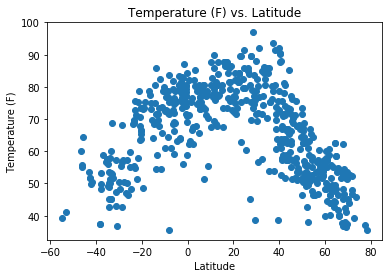

In [7]:
# Plot Temperature (F) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Temperature (F)"])
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs. Latitude")
fig1 = plt.gcf()
fig1_path = os.path.join(".","output_charts","Temperature (F) vs Latitude")
fig1.savefig(fig1_path, dpi=1200)

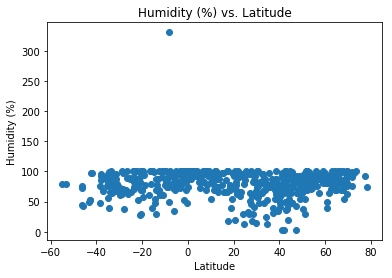

In [8]:
# Plot Humidity (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Humidity (%)"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")
fig2 = plt.gcf()
fig2_path = os.path.join(".","output_charts","Humidity (%) vs Latitude")
fig2.savefig(fig2_path, dpi=1200)

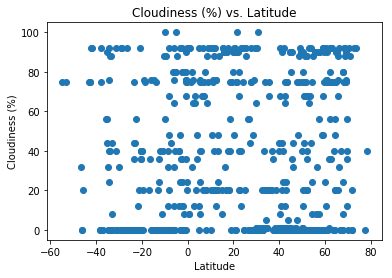

In [9]:
# Plot Cloudiness (%) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Cloudiness (%)"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")
fig3 = plt.gcf()
fig3_path = os.path.join(".","output_charts","Cloudiness (%) vs Latitude")
fig3.savefig(fig3_path, dpi=1200)

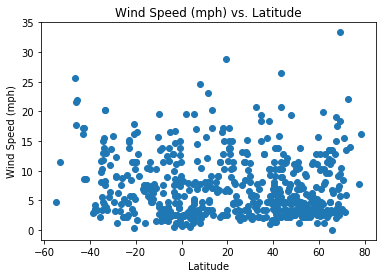

In [10]:
# Plot Wind Speed (mph) vs. Latitude
plt.scatter(x=weather_df["Latitude"], y=weather_df["Wind Speed (mph)"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed (mph) vs. Latitude")
fig4 = plt.gcf()
fig4_path = os.path.join(".","output_charts","Wind Speed (mph) vs Latitude")
fig4.savefig(fig4_path, dpi=1200)

# My Analysis

* With the increase of the latitdue from -90 to 90, temperature shows a U curve. Temperature achieves a peak at 0 latitude, which makes sense because the 0 latitude should be the Equator.
* There is no clear relationship between humidity and latitude.
* There is no clear relationship between cloudiness and latitude.
* There is no clear relationship between wind speed and latitude.